In [ ]:
import os

img_dir = r"C:\Users\souvi\OneDrive\Desktop\DefectDetect\data\NEU\raw\train\images"
print("Image directory exists:", os.path.exists(img_dir))

images = os.listdir(img_dir) if os.path.exists(img_dir) else []
print(f"Total images found: {len(images)}")

if images:
    print("First image:", images[0])
    sample_path = os.path.join(img_dir, images[0])
    print("Sample image path:", sample_path)
else:
    print("⚠️ No images found!")


Image directory exists: False
Total images found: 0
⚠️ No images found!


In [6]:
import os

# Use your actual path to the images folder
img_dir = r"C:\Users\souvi\OneDrive\Desktop\DefectDetect\data\NEU\raw\train\images"

print("Image directory exists:", os.path.exists(img_dir))

images = os.listdir(img_dir) if os.path.exists(img_dir) else []
print(f"Total images found: {len(images)}")

if images:
    print("First image:", images[0])
    sample_path = os.path.join(img_dir, images[0])
    print("Sample image path:", sample_path)
else:
    print("⚠️ No images found!")


Image directory exists: True
Total images found: 6
First image: crazing
Sample image path: C:\Users\souvi\OneDrive\Desktop\DefectDetect\data\NEU\raw\train\images\crazing


In [7]:
import os

for file in os.listdir(img_dir):
    print(file)


crazing
inclusion
patches
pitted_surface
rolled-in_scale
scratches


In [8]:
import os

# Use the path to your 'images' folder, where each class is a folder
img_dir = r"C:\Users\souvi\OneDrive\Desktop\DefectDetect\data\NEU\raw\train\images"
data_path = img_dir  # Now using images/ as the main folder

# Get all class folders (e.g., crazing, inclusion, etc.)
classes = sorted(os.listdir(data_path))
print("Classes found:", classes)


Classes found: ['crazing', 'inclusion', 'patches', 'pitted_surface', 'rolled-in_scale', 'scratches']


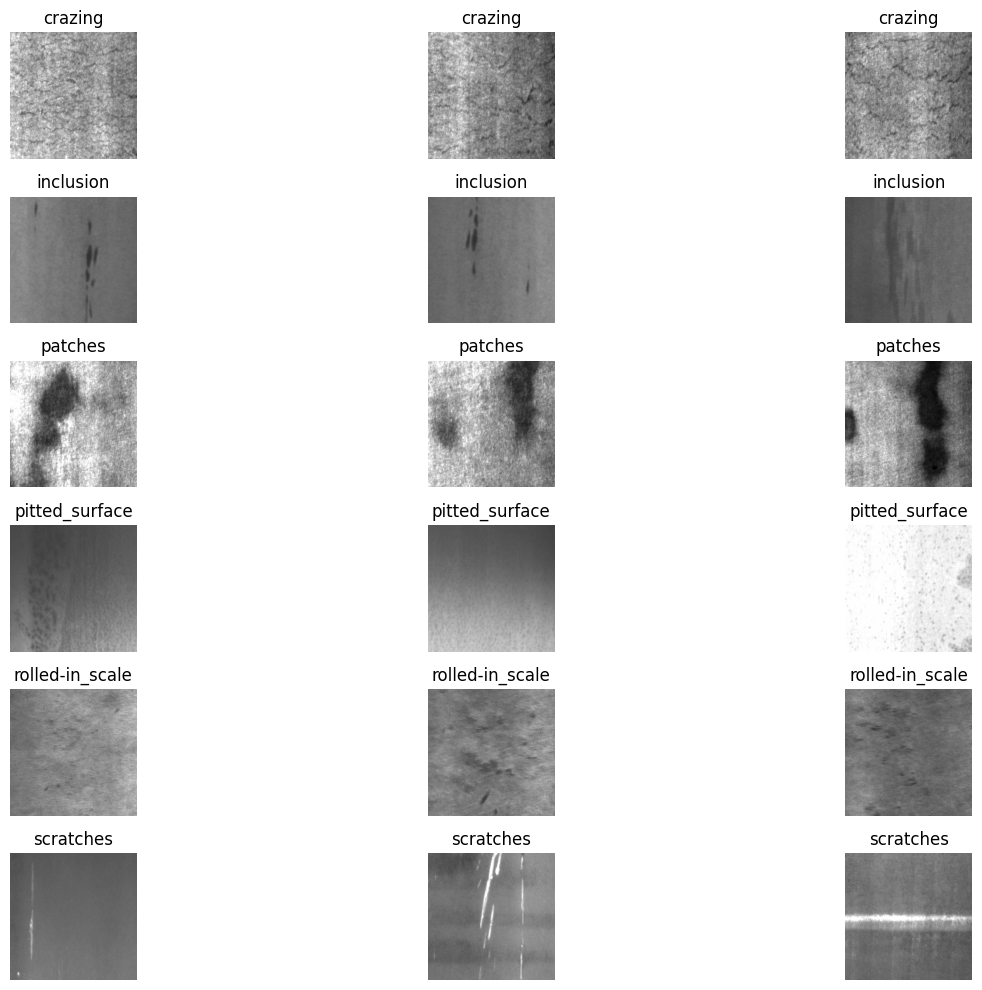

In [9]:
import cv2
import matplotlib.pyplot as plt

def show_images_per_class(data_path, classes, n=3):
    plt.figure(figsize=(15, 10))
    i = 1
    for cls in classes:
        cls_path = os.path.join(data_path, cls)
        images = os.listdir(cls_path)[:n]  # Take first 'n' images from this class
        for img_name in images:
            img_path = os.path.join(cls_path, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue  # Skip if image is unreadable
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(len(classes), n, i)
            plt.imshow(img)
            plt.title(f"{cls}")
            plt.axis("off")
            i += 1
    plt.tight_layout()
    plt.show()

# Run the function
show_images_per_class(data_path, classes)


In [10]:
from utils.data_loader import NEUDataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision

# Define transforms: resize and normalize
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # Converts HWC to CHW and scales to [0,1]
])

# Dataset and DataLoader
dataset = NEUDataset(root_dir=r"C:\Users\souvi\OneDrive\Desktop\DefectDetect\data\NEU\raw\train\images", transform=transform)
dataloader = DataLoader(dataset, batch_size=6, shuffle=True)

# Show a batch of images
batch = next(iter(dataloader))
images, labels = batch

# Use torchvision utility to plot a grid
grid = torchvision.utils.make_grid(images, nrow=3)
plt.figure(figsize=(10, 5))
plt.imshow(grid.permute(1, 2, 0))
plt.title("Sample Batch from NEU Dataset")
plt.axis("off")
plt.show()


ModuleNotFoundError: No module named 'utils'

In [11]:
import sys
sys.path.append('../utils')


In [12]:
from data_loader import NEUDataset


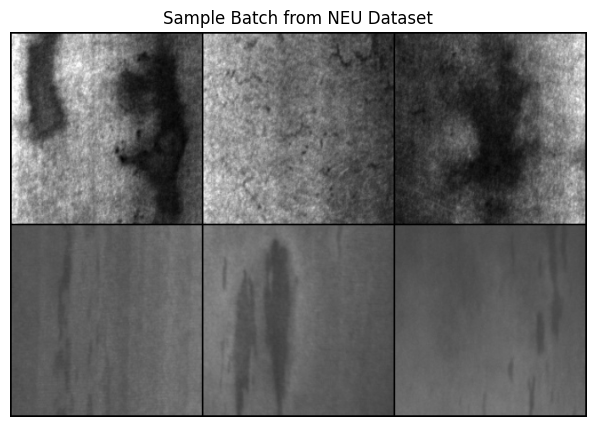

In [13]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Dataset and DataLoader
dataset = NEUDataset(
    root_dir=r"C:\Users\souvi\OneDrive\Desktop\DefectDetect\data\NEU\raw\train\images",
    transform=transform
)

dataloader = DataLoader(dataset, batch_size=6, shuffle=True)

# Get a batch
images, labels = next(iter(dataloader))

# Display the batch as a grid
grid = torchvision.utils.make_grid(images, nrow=3)
plt.figure(figsize=(10, 5))
plt.imshow(grid.permute(1, 2, 0))
plt.title("Sample Batch from NEU Dataset")
plt.axis("off")
plt.show()
